<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetic/blob/lesson2/GB_molecular_Biology_Genetic_Task_1%2BTask_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 1. База данных NCBI
Скачайте файл curated_gene_disease_associations.tsv.gz на ПК. В этом файле содержится список генов и ассоциированных с ними болезней. Что требуется сделать:
- Выберите любое из заболеваний, которое есть в списке.
- В отдельную таблицу извлеките все гены, которые связаны с избранным заболеванием.
- Для одного из генов извлеките отдельно информацию о 2–3 характеристиках на выбор, а также добавьте вырезанную по координатам последовательность гена.

Пример выполнения — в файле Task1.ipynb. Сделанное практическое задание предоставляется в формате .ipynb.

Файл ipynb. для скачивания https://colab.research.google.com/drive/1gpyi5Kdw8xEJccm1Xzsjq95JF_V7fLAC

In [149]:
try:
    import google.colab
    # Running on Google Colab, so install Biopython first
    !pip install biopython
except ImportError:
    pass


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "nedokormysh@live.com"
import pandas as pd
import xml.etree.ElementTree as ET

In [151]:
# dis = pd.read_table('/content/curated_gene_disease_associations.tsv')
dis = pd.read_table('https://github.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/raw/lesson1/curated_gene_disease_associations_june_4_2020.tsv.gz')
dis = dis[['geneId',	'geneSymbol',	'DSI',	'DPI',	'diseaseId',	'diseaseName',	'diseaseType',	'diseaseClass']]
dis.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04


## Для одного гена


- Выберите любое из заболеваний, которое есть в списке.
- В отдельную таблицу извлеките все гены, которые связаны с избранным заболеванием.

In [152]:
thalassemia_minor_db = dis.loc[dis['diseaseName'] == 'Thalassemia Minor']
thalassemia_minor_db

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass
7019,790,CAD,0.482,0.846,C0085578,Thalassemia Minor,disease,C16;C15
14533,1723,DHODH,0.576,0.769,C0085578,Thalassemia Minor,disease,C16;C15
16962,2056,EPO,0.381,0.885,C0085578,Thalassemia Minor,disease,C16;C15
23735,3040,HBA2,0.512,0.808,C0085578,Thalassemia Minor,disease,C16;C15
23764,3043,HBB,0.494,0.808,C0085578,Thalassemia Minor,disease,C16;C15
31216,3934,LCN2,0.405,0.885,C0085578,Thalassemia Minor,disease,C16;C15
51923,7036,TFR2,0.585,0.615,C0085578,Thalassemia Minor,disease,C16;C15
51958,7037,TFRC,0.437,0.885,C0085578,Thalassemia Minor,disease,C16;C15
55035,7372,UMPS,0.584,0.615,C0085578,Thalassemia Minor,disease,C16;C15
59037,8912,CACNA1H,0.628,0.423,C0085578,Thalassemia Minor,disease,C16;C15


In [153]:
gene_id_lst = thalassemia_minor_db['geneId'].tolist()
gene_id_lst

[790, 1723, 2056, 3040, 3043, 3934, 7036, 7037, 7372, 8912, 57817, 109580095]



Талассемия – это генетическая болезнь крови, при которой, из-за мутации генов, образовывается недостаточное количество гемоглобина в организме и происходит деформация эритроцитов.

Болезнь выбрал наугад. В видео сказано, что непонятно как выбрать id гена, если не заходить на сайт. Но вроде как id гена из графы id совпадает с кодом в базе данных Entrez.

Например, взял ген CAD.

In [154]:
dis.loc[7019]

geneId                        790
geneSymbol                    CAD
DSI                         0.482
DPI                         0.846
diseaseId                C0085578
diseaseName     Thalassemia Minor
diseaseType               disease
diseaseClass              C16;C15
Name: 7019, dtype: object

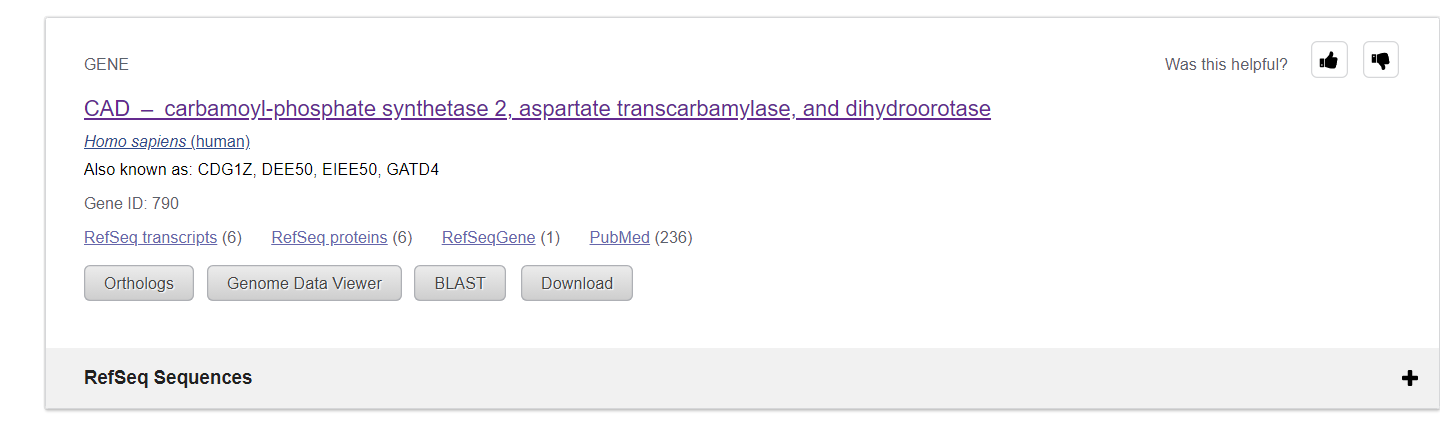


- Для одного из генов извлеките отдельно информацию о 2–3 характеристиках на выбор, а также добавьте вырезанную по координатам последовательность гена.

In [155]:
handle = Entrez.efetch(db="gene", id="790", rettype = 'xml') # получаем данные о выбранном гене (база, id, тип поиска)
gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus") # парсим данные локуса, где лежит этот ген
region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval") # парсим регион, где лежит этот ген
start = int(region.find("Seq-interval_from").text)# + 1
end = int(region.find("Seq-interval_to").text) + 1
gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
strand = region.find("Seq-interval_strand/Na-strand").get("value")
print(start, end, gi_id, strand)

27217368 27243943 568815596 plus


ещё одна проверка, что ген id совпадает

In [156]:
handle = Entrez.esummary(db="gene", id=790, rettype = 'xml')
record = Entrez.read(handle)
record['DocumentSummarySet']['DocumentSummary'][0]['Name']

'CAD'

In [157]:
id_chrom = record['DocumentSummarySet']['DocumentSummary'][0]['GenomicInfo'][0]['ChrAccVer']
id_chrom

'NC_000002.12'

In [158]:
#Выгрузить с NCBI нуклеотидную последовательность X хромосомы, для этого узнать ID хромосомы - NC_000023.11
handle = Entrez.efetch(db="nucleotide",
                       id=id_chrom, 
                       rettype = 'fasta',
                       retmode = 'text')
#загружаем
chromosome = SeqIO.read(handle, 'fasta')

In [159]:
len(chromosome.seq)

242193529

In [160]:
chromosome.seq[start:end]

Seq('AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGG...TAA')

In [161]:
#а та ли это хромосома?
chromosome.description

'NC_000002.12 Homo sapiens chromosome 2, GRCh38.p14 Primary Assembly'

In [162]:
#вырезаем из хромосомы ген, для этого узнаем локацию нужного гена. Для CAD это 27217369..27243943
geneCAD = chromosome.seq[start:end]
print(geneCAD)
len(geneCAD)

AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGGCTTCTCTCCAGCGCCCCGCGCCGTTAGCCACGTGGACCGACTCCGGCGCGCCGTCCTCACGTGGTTCCAGTGGAGTTTGCAGTCCTTCCCGCTTCTCCGTACTCGCCCCCGCCTCTGAGCTCCCTTCCCATGGCGGCCCTAGTGTTGGAGGACGGGTCGGTCCTGCGGGGCCAGCCCTTTGGGGCCGCCGTGTCGACTGCCGGGGAAGTGGGTAAGCAAGCCCGGTTAGGCTGCAGACCTTATCCCACTCTGTGATGCGCCTCTCCTCCCAACCTTCCCCGTCCAGACCCCGCCATTTTCCCGCCAGCGTACCCCCTTCCCCCATTCGGTGCCCATGGGCCCCAGCGCCATAAACCCCTCGCGACCAAGGCAGCCTCCACTGGGGCGTGCTCATCGCGCGGGGAGTGTTCCGAAGGGTGCCCTACCGGAGCCCAGCCCTGCTTCTTTCTTGCAGTGTTTCAAACCGGCATGGTCGGCTACCCCGAGGCCCTCACTGATCCCTCCTACAAGGCACAGATCTTAGTGCTCACCTATCCTCTGATCGGCAACTATGGCATCCCCCCAGATGAAATGGATGAGTTCGGTCTCTGCAAGGTAGCCACACCCAGTGCTTTCTCTACATTCCTTTTCAAGTCAGTAATTGTTAACTATTAGTGAAGTAGGAGACGTTGACACCCTGCTGGGCATCCTGCAGAAAACATACCCACTGAAGTAGTAAAGTCAAGGACTAAGATCACTAGTAACTGTAGTTAGGGGTTGTTAAGTGCCTTGGGAGGCACAGAGTGTTGGAGGCCTCAGGAAAAAGCTACCGCCTTTGTTAAGGGCATCAAGGCTCCAGGTATAGCTGAAAGCATTCTGTATGTAGTGAAGGCATGGATCAAGGAAAAGTAAAAGAGGTGTAAGGGAACAGCCTTGTCCAACTTGTTAGGCATGCAGAAGTCAGGAG

26575

## Для всех генов из таблицы

In [163]:
gene_info = thalassemia_minor_db[['geneId',	'geneSymbol']]
gene_info

,geneId,geneSymbol
7019,790,CAD
14533,1723,DHODH
16962,2056,EPO
23735,3040,HBA2
23764,3043,HBB
31216,3934,LCN2
51923,7036,TFR2
51958,7037,TFRC
55035,7372,UMPS
59037,8912,CACNA1H


In [164]:
def get_gene_info(row):
    gene_id = row['geneId']
    handle = Entrez.efetch(db="gene", id=gene_id, rettype = 'xml')
    gene_locus = ET.parse(handle).getroot().find("Entrezgene/Entrezgene_locus")
    region = gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
    start = int(region.find("Seq-interval_from").text) #+ 1
    end = int(region.find("Seq-interval_to").text) + 1
    gi_id = region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
    strand = region.find("Seq-interval_strand/Na-strand").get("value")


    handle = Entrez.esummary(db="gene", id=gene_id, rettype = 'xml')
    record = Entrez.read(handle)
    chrom_num = record['DocumentSummarySet']['DocumentSummary'][0]['Chromosome']
    mapLoc = record['DocumentSummarySet']['DocumentSummary'][0]['MapLocation']
    ID_chr = record['DocumentSummarySet']['DocumentSummary'][0]['GenomicInfo'][0]['ChrAccVer']

    handle = Entrez.efetch(db="nucleotide",
                       id=ID_chr, 
                       rettype = 'fasta',
                       retmode = 'text')
    
    chromosome = SeqIO.read(handle, 'fasta')
    gene = chromosome.seq[start: end]
   
    row['start'], row['end'], row['gi_id'], row['strand'], row['chrom_num'],\
    row['mapLoc'], row['ID chromosome'], row['gene lenght'], row['gene'] = start, end, gi_id, strand, chrom_num, mapLoc, ID_chr, len(gene), gene

    return row

Найдём информацию для каждого гена и добавим эту информацию в таблицу.

In [165]:
gene_info = gene_info.apply(get_gene_info, axis=1)
gene_info

,geneId,geneSymbol,start,end,gi_id,strand,chrom_num,mapLoc,ID chromosome,gene lenght,gene
7019,790,CAD,27217368,27243943,568815596,plus,2,2p23.3,NC_000002.12,26575,"(A, G, T, C, T, C, T, G, C, T, G, C, T, G, C, ..."
14533,1723,DHODH,72008743,72027659,568815582,plus,16,16q22.2,NC_000016.10,18916,"(G, G, G, C, T, T, A, A, T, G, A, C, G, G, A, ..."
16962,2056,EPO,100720467,100723700,568815591,plus,7,7q22.1,NC_000007.14,3233,"(C, C, T, T, T, C, C, C, A, G, A, T, A, G, C, ..."
23735,3040,HBA2,172875,173710,568815582,plus,16,16p13.3,NC_000016.10,835,"(A, C, T, C, T, T, C, T, G, G, T, C, C, C, C, ..."
23764,3043,HBB,5225463,5227071,568815587,minus,11,11p15.4,NC_000011.10,1608,"(T, T, G, C, A, A, T, G, A, A, A, A, T, A, A, ..."
31216,3934,LCN2,128149452,128153453,568815589,plus,9,9q34.11,NC_000009.12,4001,"(A, C, T, C, G, C, C, A, C, C, T, C, C, T, C, ..."
51923,7036,TFR2,100620419,100641552,568815591,minus,7,7q22.1,NC_000007.14,21133,"(T, T, A, T, T, G, A, T, A, T, C, A, G, G, T, ..."
51958,7037,TFRC,196049283,196082090,568815595,minus,3,3q29,NC_000003.12,32807,"(T, C, A, G, T, G, T, T, T, A, A, G, T, A, T, ..."
55035,7372,UMPS,124730451,124749273,568815595,plus,3,3q21.2,NC_000003.12,18822,"(C, A, A, A, C, A, G, G, C, A, G, C, G, C, G, ..."
59037,8912,CACNA1H,1153105,1221768,568815582,plus,16,16p13.3,NC_000016.10,68663,"(A, G, C, C, C, G, A, A, G, T, T, T, C, C, T, ..."


In [166]:
gene_info.to_csv('gene_info_corrected.csv', index=False)

In [167]:
df = pd.read_csv('/content/gene_info_corrected.csv')
df.head()

,geneId,geneSymbol,start,end,gi_id,strand,chrom_num,mapLoc,ID chromosome,gene lenght,gene
0,790,CAD,27217368,27243943,568815596,plus,2,2p23.3,NC_000002.12,26575,AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCC...
1,1723,DHODH,72008743,72027659,568815582,plus,16,16q22.2,NC_000016.10,18916,GGGCTTAATGACGGAAGGAGCATGGCGTGGAGACACCTGAAAGTGA...
2,2056,EPO,100720467,100723700,568815591,plus,7,7q22.1,NC_000007.14,3233,CCTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCG...
3,3040,HBA2,172875,173710,568815582,plus,16,16p13.3,NC_000016.10,835,ACTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTG...
4,3043,HBB,5225463,5227071,568815587,minus,11,11p15.4,NC_000011.10,1608,TTGCAATGAAAATAAATGTTTTTTATTAGGCAGAATCCAGATGCTC...


# Урок 2. От гена до белка
В таблицу гена, полученную по итогам практического задания первого урока, добавьте следующую информацию: аминокислотную последовательность, количество транскриптов, количество аминокислот для самой длинной изоформы белка.

Сделанное практическое задание предоставляется в формате .ipynb.

https://colab.research.google.com/drive/1YF3b8bJ-3-Wjso2KOtvmj-QB2UhEZNJQ

In [168]:
df = df.iloc[[0]]
df.T

,0
geneId,790
geneSymbol,CAD
start,27217368
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26575


In [169]:
import pandas as pd
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [170]:
seq_gene = Seq(df['gene'][0])
seq_gene

Seq('AGTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGG...TAA')

Это последовательность на смысловой цепи ДНК. Необходимо посмотреть её на матричной цепи. Для этого нам нужна комплиментраная последовательность. Также необходимо учитывать направление цепи ДНК. В данном случае, оно положительное, но создадим функцию проверки на направление.

In [171]:
def wright_way_compliment(seq_gene, strand):
  
  return seq_gene.complement() if strand == 'plus' else seq_gene.reverse_complement().complement()   

In [172]:
seq_gene_compl = wright_way_compliment(seq_gene, df['strand'][0])
seq_gene_compl

Seq('TCAGAGACGACGACGGCGGTTCGCGCGGGCTCCGAGGATGCGACGGCGCGGGCC...ATT')

Теперь можем произвести транскрибцию, т.е. переведём последовательность ДНК в РНК.

In [173]:
m_rna = seq_gene_compl.transcribe()
m_rna

Seq('UCAGAGACGACGACGGCGGUUCGCGCGGGCUCCGAGGAUGCGACGGCGCGGGCC...AUU')

Теперь произведем трансляцию РНК в белок. Требуется найти первое вхождение 'AUG' в последовательность.

In [174]:
start_codon_index = str(m_rna).find('AUG')
protein_seq_ = m_rna[start_codon_index:]
protein_seq_

Seq('AUGCGACGGCGCGGGCCGAAGAGAGGUCGCGGGGCGCGGCAAUCGGUGCACCUG...AUU')

In [175]:
len(protein_seq_)

26538

In [176]:
protein_seq_.find('UGA')

56

In [177]:
str(protein_seq_[:117])

'AUGCGACGGCGCGGGCCGAAGAGAGGUCGCGGGGCGCGGCAAUCGGUGCACCUGGCUGAGGCCGCGCGGCAGGAGUGCACCAAGGUCACCUCAAACGUCAGGAAGGGCGAAGAGGCA'

In [187]:
protein_seq_[:117]

Seq('AUGCGACGGCGCGGGCCGAAGAGAGGUCGCGGGGCGCGGCAAUCGGUGCACCUG...GCA')

In [183]:
def seq_tr(seq):
  
  triplet = ''
  triplets = []
  i = 0

  for f in range(len(seq)):
    triplet += seq[f]
    if len(triplet) == 3:
        i+=1
        triplets.append((triplet , i, Seq(triplet).translate()))
        triplet = ''
  
  print(triplets)

In [189]:
seq_tr(protein_seq_[:120])

[('AUG', 1, Seq('M')), ('CGA', 2, Seq('R')), ('CGG', 3, Seq('R')), ('CGC', 4, Seq('R')), ('GGG', 5, Seq('G')), ('CCG', 6, Seq('P')), ('AAG', 7, Seq('K')), ('AGA', 8, Seq('R')), ('GGU', 9, Seq('G')), ('CGC', 10, Seq('R')), ('GGG', 11, Seq('G')), ('GCG', 12, Seq('A')), ('CGG', 13, Seq('R')), ('CAA', 14, Seq('Q')), ('UCG', 15, Seq('S')), ('GUG', 16, Seq('V')), ('CAC', 17, Seq('H')), ('CUG', 18, Seq('L')), ('GCU', 19, Seq('A')), ('GAG', 20, Seq('E')), ('GCC', 21, Seq('A')), ('GCG', 22, Seq('A')), ('CGG', 23, Seq('R')), ('CAG', 24, Seq('Q')), ('GAG', 25, Seq('E')), ('UGC', 26, Seq('C')), ('ACC', 27, Seq('T')), ('AAG', 28, Seq('K')), ('GUC', 29, Seq('V')), ('ACC', 30, Seq('T')), ('UCA', 31, Seq('S')), ('AAC', 32, Seq('N')), ('GUC', 33, Seq('V')), ('AGG', 34, Seq('R')), ('AAG', 35, Seq('K')), ('GGC', 36, Seq('G')), ('GAA', 37, Seq('E')), ('GAG', 38, Seq('E')), ('GCA', 39, Seq('A')), ('UGA', 40, Seq('*'))]


In [42]:
protein = protein_seq_.translate()
protein

Seq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

In [190]:
protein.find('*')

39

In [192]:
protein[:39]

Seq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA')

In [193]:
# Добавим последовательность белка в таблицу
df['prot.seq.example'] = str(protein[:39])

Необходимо найти количество транскриптов. На сайте имеем 6 транскриптов.

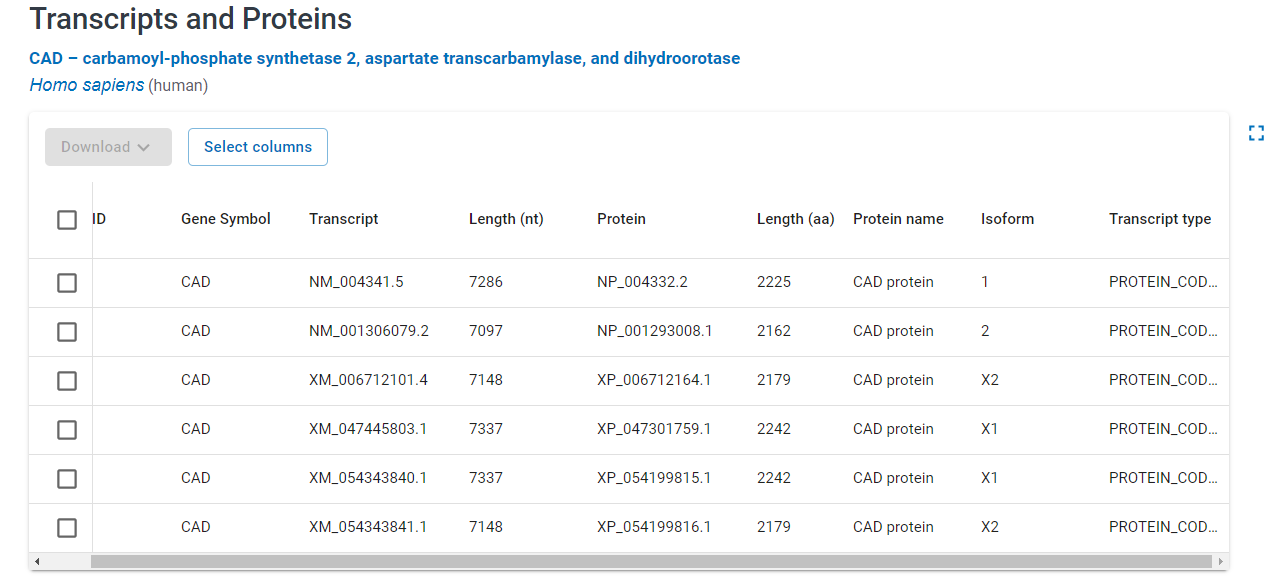

Но поиск по разделу nucleotide и nuccore выдаёт ещё 5 лишних последовательности.

In [195]:
handle = Entrez.esearch(db="nucleotide", term='CAD[Gene Name] AND "790"[entrezID] AND "human"[Organism] AND RefSeq[Keyword]', idtype="acc")
record = Entrez.read(handle)
handle.close()
record['IdList'], len(record['IdList'])

(['XM_054343841.1', 'XM_054343840.1', 'XM_006712101.4', 'XM_047445803.1', 'NC_060925.1', 'NC_060926.1', 'NC_000001.11', 'NC_000002.12', 'NM_001306079.2', 'NM_004341.5', 'NG_046394.1'],
 11)

Поиск по протеинам выдаёт 6 нужных нам комбинаций.

In [196]:
# Получаем список белков по имени гена из базы `protein` 
handle = Entrez.esearch(db="protein", term='CAD[Gene Name] AND "790"[entrezID] AND "human"[Organism] AND RefSeq[Keyword]', idtype="acc"
                        )
record = Entrez.read(handle)
handle.close()
record

{'Count': '6', 'RetMax': '6', 'RetStart': '0', 'IdList': ['XP_054199816.1', 'XP_054199815.1', 'XP_047301759.1', 'XP_006712164.1', 'NP_001293008.1', 'NP_004332.2'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'CAD[Gene Name]', 'Field': 'Gene Name', 'Count': '31325', 'Explode': 'N'}, {'Term': '"790"[All Fields]', 'Field': 'All Fields', 'Count': '1535972', 'Explode': 'N'}, 'AND', {'Term': '"human"[Organism]', 'Field': 'Organism', 'Count': '1900094', 'Explode': 'Y'}, 'AND', {'Term': 'RefSeq[Keyword]', 'Field': 'Keyword', 'Count': '262559783', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'CAD[Gene Name] AND "790"[All Fields] AND "human"[Organism] AND RefSeq[Keyword]', 'ErrorList': {'FieldNotFound': ['entrezID'], 'PhraseNotFound': []}}

In [197]:
handle = Entrez.efetch(db="protein",
                           id=2462577006,
                           rettype = 'gb',
                           retmode = 'text')
info = SeqIO.read(handle, 'gb')
info

SeqRecord(seq=Seq('MAALVLEDGSVLRGQPFGAAVSTAGEVVFQTGMVGYPEALTDPSYKAQILVLTY...GRF'), id='XP_054199816.1', name='XP_054199816', description='CAD protein isoform X2 [Homo sapiens]', dbxrefs=['BioProject:PRJNA807723'])

Оставим только белки с accession number, начинающиеся на NP_ (или можно было бы взять NM_ )

In [198]:
transcriptions_list = [el for el in record['IdList'] if 'NP' in el]
transcriptions_list

['NP_001293008.1', 'NP_004332.2']

In [199]:
df['num_of_transcripts'] = len(transcriptions_list)

Выгрузим последовательности наших белков и найдём белок максимальной длины

In [200]:
def max_length_protein(transcriptions_list):
  max = 0
  for el in transcriptions_list:
    
    handle = Entrez.efetch(db="protein",
                           id=el,
                           rettype = 'gb',
                           retmode = 'text')
    protein = SeqIO.read(handle, 'gb')
    if len(protein.seq) > max:
      max_prot_id, max_prot_seq = protein.id, protein.seq

  return max_prot_id, max_prot_seq

In [201]:
max_length_protein(transcriptions_list)

('NP_004332.2',
 Seq('MAALVLEDGSVLRGQPFGAAVSTAGEVVFQTGMVGYPEALTDPSYKAQILVLTY...GRF'))

In [202]:
df['gr_acid_num'] = len(max_length_protein(transcriptions_list)[1])

In [203]:
df.T

,0
geneId,790
geneSymbol,CAD
start,27217368
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26575


In [205]:
df['num_of_transcripts']=6

In [206]:
df.T

,0
geneId,790
geneSymbol,CAD
start,27217368
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26575


In [207]:
df.to_csv('df_task_2_corrected.csv')